In [17]:
#install packages
install.packages("ggplot2")
install.packages("randomForest")
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [18]:
heart<-read.csv("Datasets/heart_failureset.csv")
head(heart)

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
75,0,582,0,20,1,265000,1.9,130,1,0,4,1
55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
65,0,146,0,20,0,162000,1.3,129,1,1,7,1
50,1,111,0,20,0,210000,1.9,137,1,0,7,1
65,1,160,1,20,0,327000,2.7,116,0,0,8,1
90,1,47,0,40,1,204000,2.1,132,1,1,8,1


In [20]:
#check data types
str(heart)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


In [21]:
#find and omit missing values
heart1=na.omit(heart)
str(heart1)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ time                    : int  4 6 7 7 8 8 10 10 10 10 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


In [73]:
#since our response variable is the death_event, time (of death) feature is not very useful in this case. The question is not when they die, its if they will die at all.
heart1$time<-NULL
#add a new age bracket
heart1$age<- as.integer(heart1$age)
str(heart1)
heart1$Older_than_30 <- ifelse(heart1$age >= 30,"30+", "Under 30")
head(heart1)

'data.frame':	299 obs. of  13 variables:
 $ age                     : int  35 16 27 11 27 45 35 21 27 39 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 1 2 ...
 $ DEATH_EVENT             : Factor w/ 2 levels "Died","Did Not Die": 2 2 2 2 2 2 2 2 2 2 ...
 $ Older_than_30           : chr  "Yes" "No" "No" "No" ...


age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT,Older_than_30
35,0,582,0,20,1,265000,1.9,130,1,0,Did Not Die,30+
16,0,7861,0,38,0,263358,1.1,136,1,0,Did Not Die,Under 30
27,0,146,0,20,0,162000,1.3,129,1,1,Did Not Die,Under 30
11,1,111,0,20,0,210000,1.9,137,1,0,Did Not Die,Under 30
27,1,160,1,20,0,327000,2.7,116,0,0,Did Not Die,Under 30
45,1,47,0,40,1,204000,2.1,132,1,1,Did Not Die,30+


In [ ]:
#anaemia does not have noticable effect
#platelets doesn't seem to have a noticable effect
#serum_creatinine does have a noticable effect but seems like a secondary symptom rather than an identifying feature
#serum_sodium seems to have a strong correlation between those who died and those who didn't, regardless of age
#this set is interesting because it has relatively the same ratio of people dying across all age brackets
#if creatinine_phosphokinase is high in younger patients, they were more likely to die. 
    #usually a signal of acute muscle injury
    #This makes sense, a younger body would have more muscle mass and have a larger influx of CPK into the bloodstream? Faster?
    #This could make it more challenging to filter out the CPK and could result in death more quickly?
#high ejection fraction has a higher correlation with death events. The faster the heart pumps out the blood, the higher the blood pressure


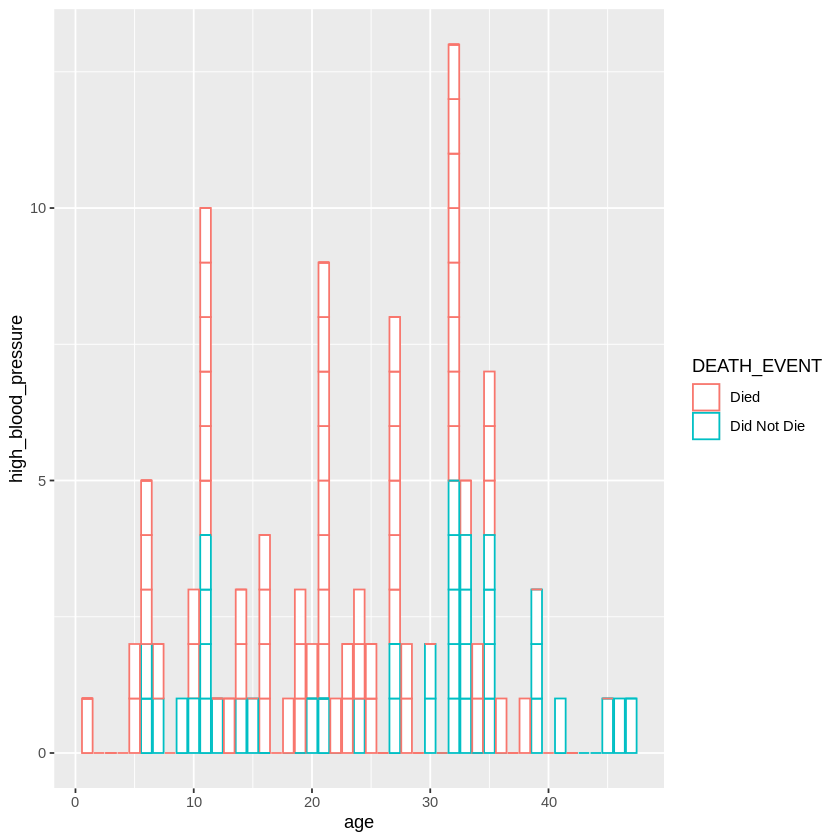

In [110]:
levels(heart1$DEATH_EVENT) <- c("Died", "Did Not Die")
ggplot(heart1, aes(x=age, y=high_blood_pressure,color=DEATH_EVENT)) + 
  geom_bar(stat = "identity",fill="white")

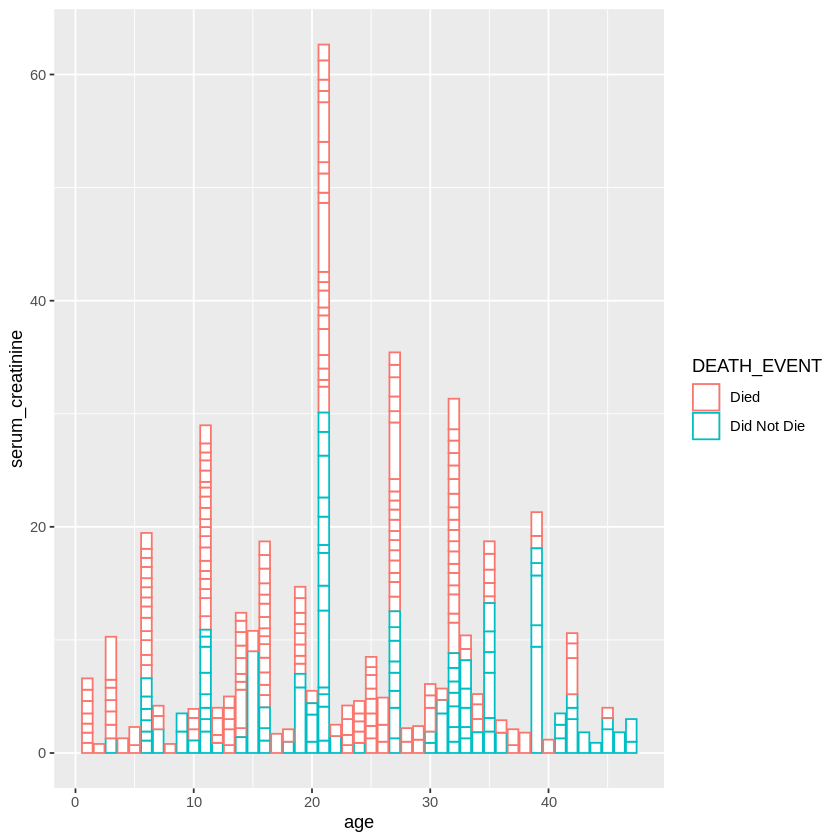

In [111]:
ggplot(heart1, aes(x=age, y=serum_creatinine,color=DEATH_EVENT)) + 
  geom_bar(stat = "identity",fill="white")

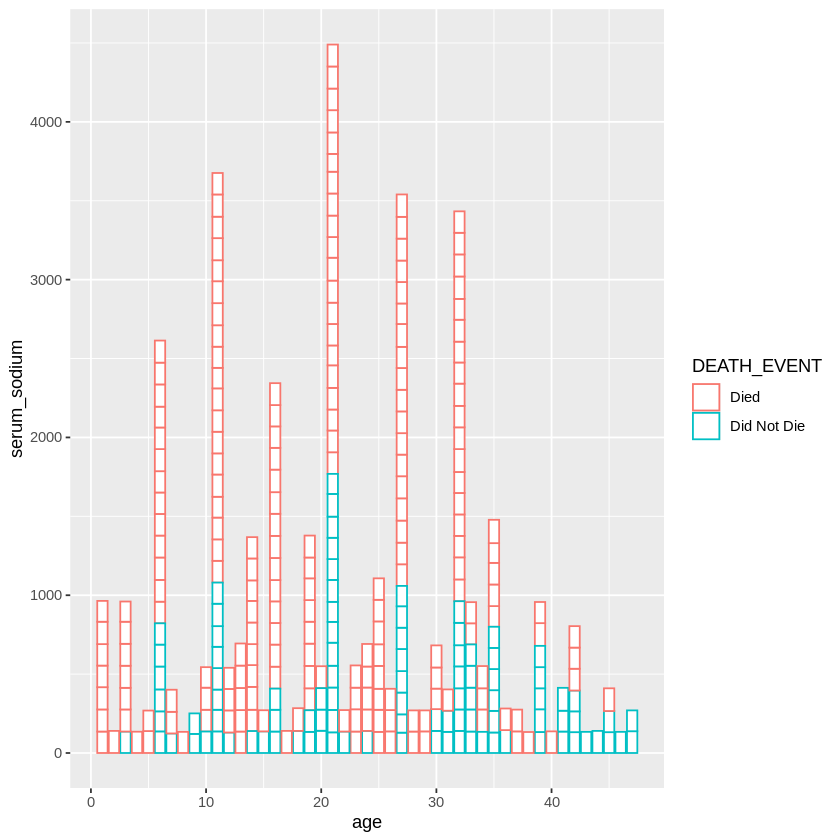

In [112]:
ggplot(heart1, aes(x=age, y=serum_sodium,color=DEATH_EVENT)) + 
  geom_bar(stat = "identity",fill="white")

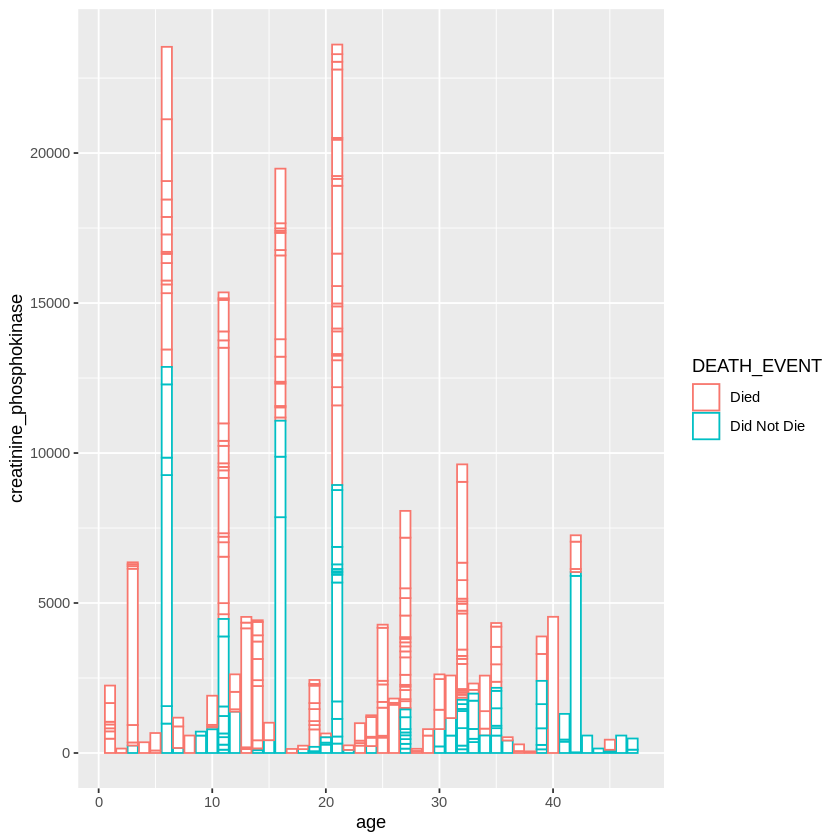

In [113]:
ggplot(heart1, aes(x=age, y=creatinine_phosphokinase,color=DEATH_EVENT)) + 
  geom_bar(stat = "identity",fill="white")

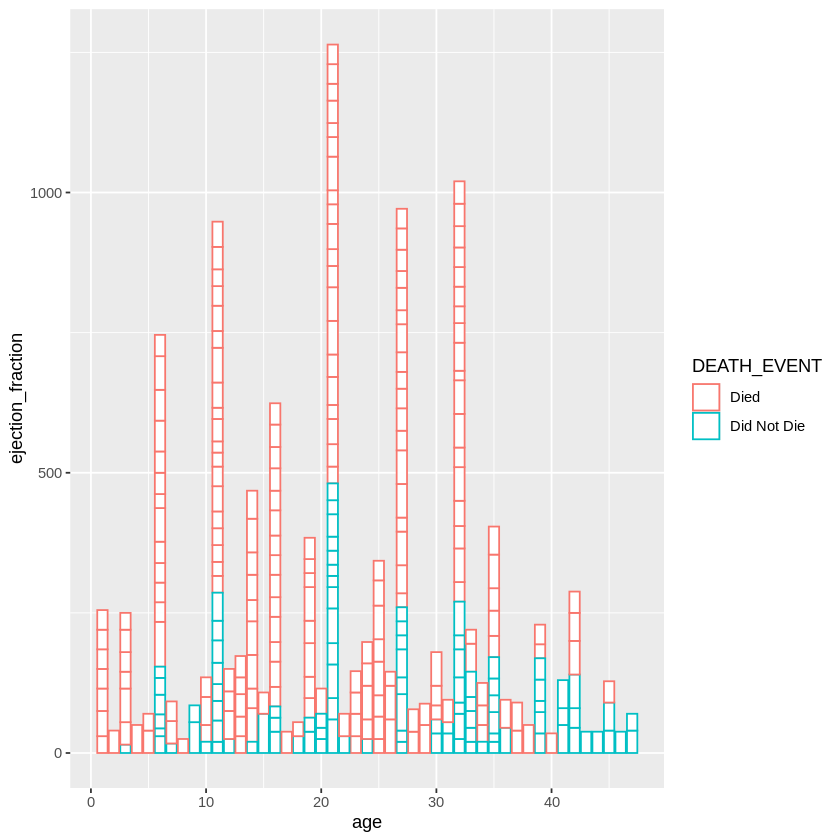

In [114]:
ggplot(heart1, aes(x=age, y=ejection_fraction,color=DEATH_EVENT)) + 
  geom_bar(stat = "identity",fill="white")

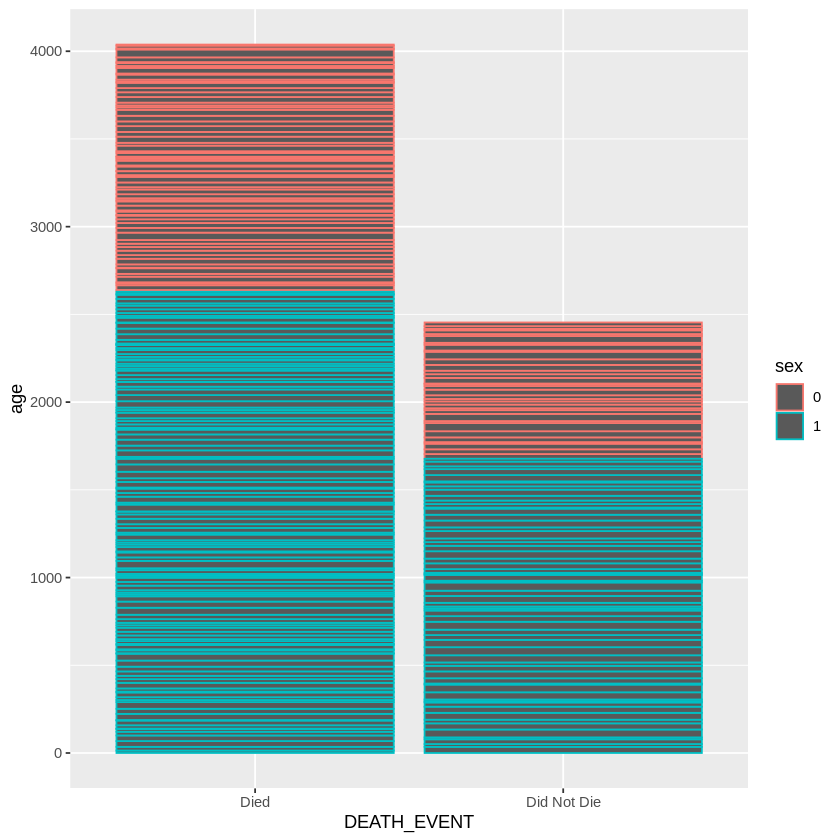

In [108]:
heart1$sex=as.factor(heart1$sex)
ggplot(heart1, aes(x=DEATH_EVENT, y=age,color=sex)) + 
  geom_bar(stat = "identity")

In [ ]:
#sex does not appear to have an effect

The main indicator that has the strongest correlation with death event is high blood pressure. The other indicators also display a strong correlation, but I think they are secondary.
For example, serum sodium and ejection fracture can be one in the same symptomatically. The higher the Ejection fraction climbs,the faster the heart is out pumping blood. This could be caused by a number of things including acute muscle injury (creatinine phosphokinase leakage) or high sodium intake that increases water retention in blood to dilute it.
If the patient is younger than 22, creatine phosphokinase seems to be a strong indicator. It's difficult to tell with this data if that is a reliable feature to build the model off of.